# Homework 26

Section 6.1

Logan Schelly

Math 402

Fall 2019

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from scipy import linalg as la
from timeit import timeit

totally_random_string = 'cglover52'
my_seed = int(totally_random_string, base=36)%2**32
np.random.seed(my_seed)

### Exercise 6.2
Code up a least-squares linear solver in NumPy.  Your method should accept two NumPy arrays: an $n\times d$ array $\mathbb{X}$ (an $n$-fold sample from the independent variables) and an array $\mathbf{y}$ of length $n$ (a draw from a length-$n$ sample from the dependent variable) and return an array $\hat{\boldsymbol{\beta}} = (\mathbb{X}^{\intercal}\mathbb{X})^{-1}\mathbb{X}\mathbf{y}$ of length $d$ (the estimated coefficients of the linear model).  Instead of computing the inverse $(\mathbb{X}^{\intercal}\mathbb{X})^{-1}$, solve the system $\mathbb{X}^{\intercal}\mathbb{X} \hat{\boldsymbol{\beta}} = \mathbb{X}^{\intercal}\mathbf{y}$ using ``numpy.linalg.solve`` (why?).

In [2]:
def l_sq_solve(X, y):
    return np.linalg.solve(X.T.dot(X), X.T.dot(y))

#you use numpy.linalg.solve because inverting a matrix is more temporally complex than solving a system.

#### Part (i)
Let $n=100$.  Generate artificial data with one independent variable and one constant term by setting ``X = np.hstack([np.ones((n,1)), np.random.random((n,1))])`` and let ``beta = [2, 0.5]``.  Set ``e = 0.1*np.random.randn(n)``, and ``y = np.dot(X, beta) + e``.  Run your solver on the generated data ``X`` and ``y``, and compare the result to the known value of ``beta``.

In [3]:
n=100

X = np.hstack([np.ones((n,1)), np.random.random((n,1))])
beta = np.array([2, 0.5])
e = 0.1*np.random.randn(n)
y = np.dot(X, beta) + e

beta_hat = l_sq_solve(X, y)

np.set_printoptions(precision=8, floatmode='fixed')
print("Original beta: ", beta)
print("Estimate beta: ", beta_hat)
np.set_printoptions()

#Save the random data for a later problem.
part1 = dict()
part1['X'] = X
part1['beta'] = beta
part1['e'] = e

Original beta:  [2.00000000 0.50000000]
Estimate beta:  [1.97820817 0.50152349]


#### Part (ii)
Plot the data from the previous step and the lines $y = \hat{\beta}_0 + \hat{\beta}_1 x$ and $y = \beta_0 + \beta_1 x$ on the same graph.

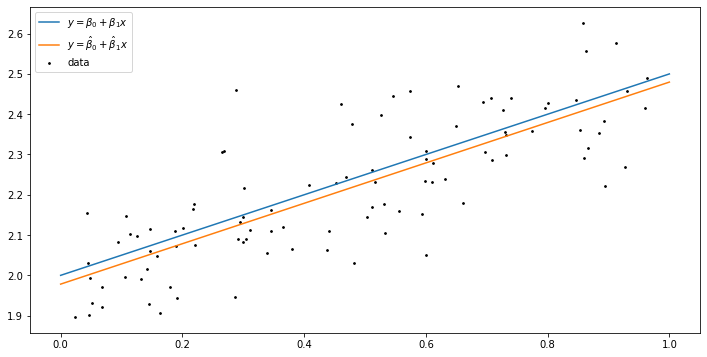

In [4]:
x = np.array([0,1]) #It's a straight line.
plt.figure(figsize=(12, 6))
plt.scatter(X[:,1], y, label='data', s=3, color='k')
plt.plot(x, beta[0] + beta[1]*x, label = r'$y = \beta_0 + \beta_1 x$')
plt.plot(x, beta_hat[0] + beta_hat[1]*x, label=r'$y = \hat{\beta}_0 + \hat{\beta}_1 x$')

plt.legend()
plt.show()

#### Part (iii)
Using the data
$$
(-1.7070417,  12.97711586),
( 0.48566752, -0.07882501),\\
( 1.62940736,  8.01895309),
(-1.03619688,  6.0190389 ),\\
( 0.5160501 ,  1.28260097),
( 0.07292432, -0.15612727),\\
( 0.19432016, -0.5740016),
(1.98853255 , 9.29385226),\\
(-1.20937744, 7.86261889),
(0.24718355 , 0.05378747)
$$
consisting of the pairs $(x_i, y_i)$, use your solver to fit a line to the data and then again ot fit a quadratic curve.  Plot the data and the line and the curve all in the same plot.

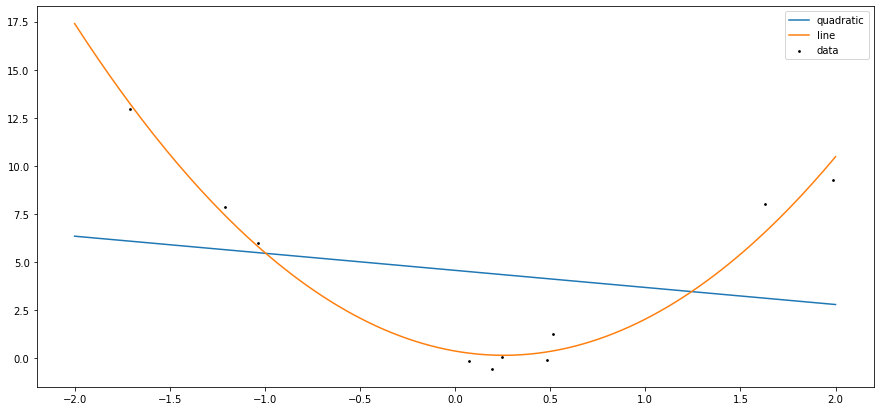

In [5]:
data = np.array([
    (-1.7070417,  12.97711586),
    ( 0.48566752, -0.07882501),
    ( 1.62940736,  8.01895309),
    (-1.03619688,  6.0190389 ),
    ( 0.5160501 ,  1.28260097),
    ( 0.07292432, -0.15612727),
    ( 0.19432016, -0.5740016),
    (1.98853255 , 9.29385226),
    (-1.20937744, 7.86261889),
    (0.24718355 , 0.05378747)
])

x = data[:,0]
y = data[:,1]

#Fit a line.
x_col = x.reshape((-1,1))
X_line = np.hstack((x_col, np.ones_like(x_col)))
beta_line = l_sq_solve(X_line, y)
line_func = lambda z : z*beta_line[0] + beta_line[1]

#Fit a quadratic.
X_quad = np.hstack((x_col**2, x_col, np.ones_like(x_col)))
beta_quad = l_sq_solve(X_quad, y)
quad_func = lambda z: z**2 * beta_quad[0] + z * beta_quad[1] + beta_quad[2]

#Plot the data, the line, and the quadratic.
fig = plt.figure(figsize = (15, 7))
plt.scatter(x, y, s=3, color='black', label='data')
z = np.linspace(-2, 2, 200)
plt.plot(z, line_func(z), label = 'quadratic')
plt.plot(z, quad_func(z), label= 'line')
plt.legend()
plt.show()

#Save the data for a later problem.
part3_data = data

#### Part (iv)
Let $n = 10^4$.  Generate artificial data with three independent variables $d=3$ and a constant term, and let ``beta = [1, -2, 3, -4]``.  Set ``e = 0.5*np.random.randn(n)``, and ``y = np.dot(X, beta) + e``.  Run your solver on the generated data ``X`` and ``y`` and compare the result to the known value of ``beta``.

In [6]:
n = 10**4
d = 3

X = np.empty((n, d+1))
X[:, -1] = 1 #Constant term.
X[:, :3] = np.random.random((n, d)) #d independent variables. (all are uniform on (0,1)).

beta = np.array([1, -2, 3, -4], dtype=float)

e = 0.5 * np.random.randn(n)

y = np.dot(X, beta) + e

beta_hat = l_sq_solve(X, y)

np.set_printoptions(precision=8, floatmode='fixed')
print("Original beta:", beta)
print("Estimate beta:", beta_hat)
np.set_printoptions()

#save the data for a later problem.
part4 = dict()
part4['X'] = X
part4['beta'] = beta
part4['e'] = e

Original beta: [ 1.00000000 -2.00000000  3.00000000 -4.00000000]
Estimate beta: [ 0.97858511 -2.00962484  3.01424523 -3.99206312]


### Exercise 6.4
Code up a least-squares solver in NumPy that uses QR decomposition and the result of the previous problem to compute $\hat{\boldsymbol{\beta}}$.  You should use ``scipy.linalg.solve_triangular`` to solve the system instead of inverting $R_1$.  (How is ``solve_triangular`` better than plain ``solve``?)  Your method should accept two NumPy arrays: an $n\times d$ array $\mathbb{X}$ (an $n$-fold sample from the independent variables) and an array $\mathbf{y}$ of length $n$ (a draw from a length-$n$ sample from the dependent variable) and return an array $\hat{\boldsymbol{\beta}}$ of length $d$ (the estimated coefficients of the linear model).

##### Why ``solve_triangular`` is better than ``solve``:
It is less temporally complex.  Solve probably uses L-U decomposition, but when a matrix is triangular, you basically can just shortcut to setting L to the identity and U equal to the triangular matrix (or vice-versa).

In [7]:
def l_sq_QR_solve(X, y):
    #Grab the reduce QR Decomposition.
    Q, R = np.linalg.qr(X, mode='reduced')
    #Multiply Q^T to both sides, we now have R @ beta = A^T @ y
    C = Q.T.dot(y)
    #Solve for beta, using the fact that R is upper triangular
    return la.solve_triangular(R, C)

### Exercise 6.4 (continued)
For each of the subproblems (i) - (iv) from Exercise 6.2, run your solver on the data, compare the result to the known value of $\boldsymbol{\beta}$, and compare the speed and accuracy of your QR-based solver to to the solver of Exercise 6.2.

In [8]:
#Grab the independent variable for each part.
y1 = np.dot(part1['X'], part1['beta']) + part1['e']
y3 = part3_data[:,1]
y4 = np.dot(part4['X'], part4['beta']) + part4['e']

#Make a list of what X, y, and beta was for each computtion.
Xs = [part1['X'], X_line, X_quad, part4['X']]
ys = [y1, y3, y3, y4]
betas = [part1['beta'], None, None, part4['beta']]
titles = ["Part i", "Part iii - Line", "Part iii - Quadratic", "Part iv"]

np.set_printoptions(precision=8, floatmode='fixed')

#Iterate through each one.
for X, y, beta, title in zip(Xs, ys, betas, titles):
    print("\t"+title)

    beta_hat_QR = l_sq_QR_solve(X, y)
    beta_hat_np = l_sq_solve(X, y)

    print("Original beta:", beta if beta is not None else "None")
    print("QR solve beta:", beta_hat_QR)
    print("np solve beta:", beta_hat_np)
    print("Distance between the two beta estimates:", la.norm(beta_hat_QR - beta_hat_np))
    print()

    lst_sq_setup = "from __main__ import X, y\n"
    QR_setup = "from __main__ import l_sq_QR_solve"
    normal_setup = "from __main__ import l_sq_solve"

    QR_time = timeit("l_sq_QR_solve(X, y)", lst_sq_setup + QR_setup, number=10000) / 10000
    normal_time = timeit("l_sq_solve(X, y)", lst_sq_setup + normal_setup, number=10000) / 10000

    print("Average seconds to execute amoung 10,000 QR solves:     {:1.8f}".format(QR_time))
    print("Average seconds to execute amoung 10,000 normal solves: {:1.8f}".format(normal_time))
    print()
    print()

np.set_printoptions()

	Part i
Original beta: [2.00000000 0.50000000]
QR solve beta: [1.97820817 0.50152349]
np solve beta: [1.97820817 0.50152349]
Distance between the two beta estimates: 9.543398592644793e-15

Average seconds to execute amoung 10,000 QR solves:     0.00009873
Average seconds to execute amoung 10,000 normal solves: 0.00001409


	Part iii - Line
Original beta: None
QR solve beta: [-0.88757888  4.57476610]
np solve beta: [-0.88757888  4.57476610]
Distance between the two beta estimates: 4.440892098500626e-16

Average seconds to execute amoung 10,000 QR solves:     0.00007508
Average seconds to execute amoung 10,000 normal solves: 0.00001163


	Part iii - Quadratic
Original beta: None
QR solve beta: [ 3.38880544 -1.72945238  0.38201132]
np solve beta: [ 3.38880544 -1.72945238  0.38201132]
Distance between the two beta estimates: 1.1551122306821434e-15

Average seconds to execute amoung 10,000 QR solves:     0.00007471
Average seconds to execute amoung 10,000 normal solves: 0.00001147


	Part i

##### Note about graphs for Exercise 6.4:
Since the beta estimates are extremely similar, I didn't think it'd be worth the time to show the graphs we get in part (ii) and part (iii).  To the human eye, the graphs would be indistinguishable.

### Exercise 6.5
The file ``DatasaurusDozen.tsv`` has 13 datasets with several x and y values for each set.  You can read them into a pandas dataframe with ``pd.read_csv('DatasaurusDozen.tsv', sep='t', header=0)``.  For each dataset, compute the mean and sample variance for $x$ and $y$, and use your OLS solver from the previous problem to compute the slope and intercept of the line of best fit; then plot the line and the original data on the same graph.  How do you interpret the results?

	 dino
x has mean 54.263273 and variance 281.069988
y has mean 47.832253 and variance 725.515961



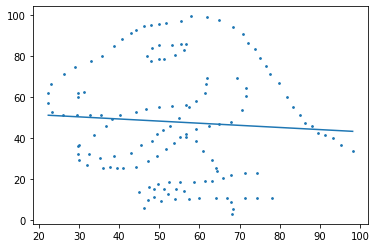

	 away
x has mean 54.266100 and variance 281.227029
y has mean 47.834721 and variance 725.749775



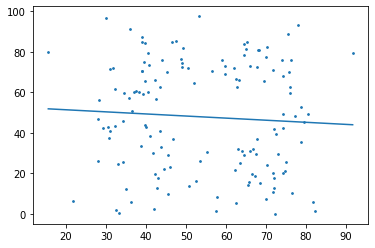

	 h_lines
x has mean 54.261442 and variance 281.095333
y has mean 47.830252 and variance 725.756931



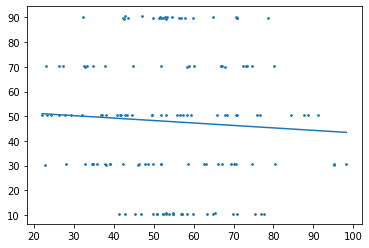

	 v_lines
x has mean 54.269927 and variance 281.231512
y has mean 47.836988 and variance 725.638809



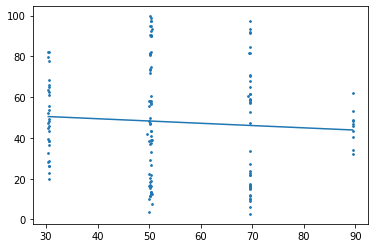

	 x_shape
x has mean 54.260150 and variance 281.231481
y has mean 47.839717 and variance 725.224991



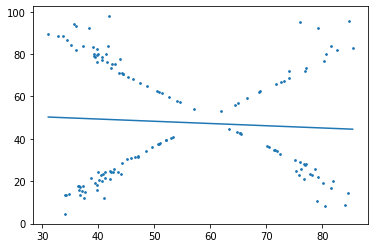

	 star
x has mean 54.267341 and variance 281.197993
y has mean 47.839545 and variance 725.239695



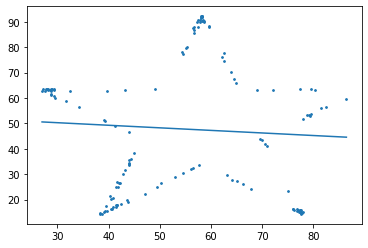

	 high_lines
x has mean 54.268805 and variance 281.122364
y has mean 47.835450 and variance 725.763490



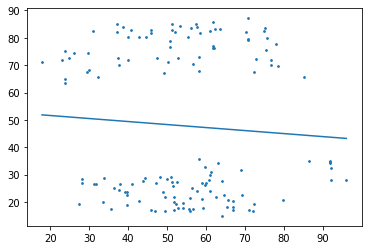

	 dots
x has mean 54.260303 and variance 281.156953
y has mean 47.839829 and variance 725.235215



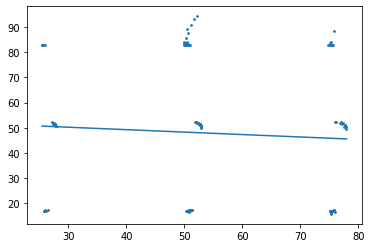

	 circle
x has mean 54.267320 and variance 280.898024
y has mean 47.837717 and variance 725.226844



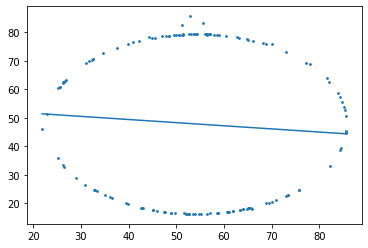

	 bullseye
x has mean 54.268730 and variance 281.207393
y has mean 47.830823 and variance 725.533372



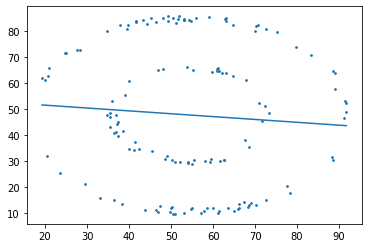

	 slant_up
x has mean 54.265882 and variance 281.194420
y has mean 47.831496 and variance 725.688605



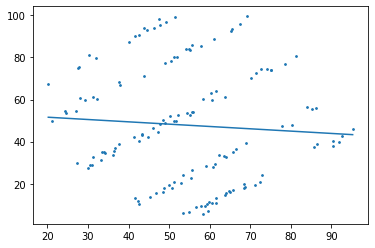

	 slant_down
x has mean 54.267849 and variance 281.124206
y has mean 47.835896 and variance 725.553749



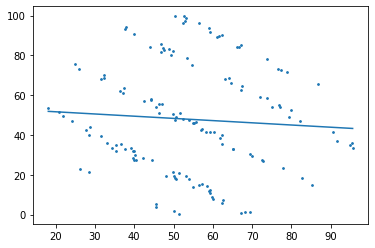

	 wide_lines
x has mean 54.266916 and variance 281.232887
y has mean 47.831602 and variance 725.650560



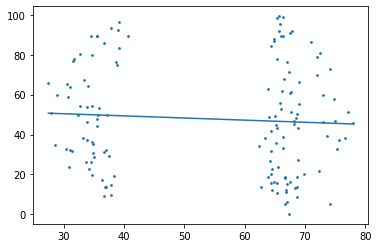

In [9]:
dsd = pd.read_csv('DatasaurusDozen.tsv', sep='\t', header=0)

for dataset_name in dsd['dataset'].unique():
    print("\t", dataset_name)
    data = dsd[dsd['dataset'] == dataset_name]
    print("x has mean {0:f} and variance {1:f}".format(data.x.mean(), data.x.var()))
    print("y has mean {0:f} and variance {1:f}".format(data.y.mean(), data.y.var()))
    print()
    
    X = np.vstack((data.x.values, np.ones_like(data.x.values)))
    X = X.T
    beta_hat = l_sq_QR_solve(X, data.y.values)
    
    t = np.linspace(data.x.min(), data.x.max(), 2)
    plt.scatter(data.x, data.y, s=3)
    plt.plot(t, beta_hat[0]*t + beta_hat[1])
    plt.show()
    

##### Interpretation of results:

Dude... Least squares isn't going to capture all of the info about your data... dude.  Radical.

All 12 datasets look radically different, but they all have the same least squares regression line.

### Exercise 6.6
Use the SVD to code up an OLS solver that does not require the columns of $\mathbb{X}$ to be linearly independent.

In [10]:
def l_sq_SVD_solve(X, y):
    U, sigma, V_T = np.linalg.svd(X, full_matrices = False)
    mask = np.logical_not(np.isclose(sigma, 0)) #Only grab the large stuff
    U, sigma, V_T = U[:,mask], sigma[mask], V_T[mask, :]
    V = V_T.T #Untranspose it.
    return V.dot(1/sigma*(U.T.dot(y)))
    

#### Part (i)
For each of the subproblems (i)-(iv) from Exercise 6.2, run your solver on the data, compare the result to the known value of $\boldsymbol{\beta}$, and compare the speed and accuracy of your SVD-based solver with the QR-based solver and the solver of Exercise 6.2.

In [11]:
#Grab the independent variable for each part.
y1 = np.dot(part1['X'], part1['beta']) + part1['e']
y3 = part3_data[:,1]
y4 = np.dot(part4['X'], part4['beta']) + part4['e']

#Make a list of what X, y, and beta was for each computtion.
Xs = [part1['X'], X_line, X_quad, part4['X']]
ys = [y1, y3, y3, y4]
betas = [part1['beta'], None, None, part4['beta']]
titles = ["Part i", "Part iii - Line", "Part iii - Quadratic", "Part iv"]

np.set_printoptions(precision=8, floatmode='fixed')

#Iterate through each one.
for X, y, beta, title in zip(Xs, ys, betas, titles):
    print("\t"+title)
    
    beta_hat_SVD = l_sq_SVD_solve(X, y)
    beta_hat_QR = l_sq_QR_solve(X, y)
    beta_hat_np = l_sq_solve(X, y)

    print("Original beta:", beta if beta is not None else "None")
    print("SVD solve beta:", beta_hat_SVD)
    print("QR solve beta:", beta_hat_QR)
    print("np solve beta:", beta_hat_np)
    print("Distance between SVD and np.solve:", la.norm(beta_hat_SVD - beta_hat_np))
    print()
    
    lst_sq_setup = "from __main__ import X, y\n"
    SVD_setup = "from __main__ import l_sq_SVD_solve"
    QR_setup = "from __main__ import l_sq_QR_solve"
    normal_setup = "from __main__ import l_sq_solve"
    
    SVD_time = timeit("l_sq_SVD_solve(X, y)", lst_sq_setup + SVD_setup, number=10000) / 10000
    QR_time = timeit("l_sq_QR_solve(X, y)", lst_sq_setup + QR_setup, number=10000) / 10000
    normal_time = timeit("l_sq_solve(X, y)", lst_sq_setup + normal_setup, number=10000) / 10000
    
    print("Average seconds to execute amoung 10,000 SVD solves:    {:1.8f}".format(SVD_time))
    print("Average seconds to execute amoung 10,000 QR solves:     {:1.8f}".format(QR_time))
    print("Average seconds to execute amoung 10,000 normal solves: {:1.8f}".format(normal_time))
    print()
    print()

np.set_printoptions()

	Part i
Original beta: [2.00000000 0.50000000]
SVD solve beta: [1.97820817 0.50152349]
QR solve beta: [1.97820817 0.50152349]
np solve beta: [1.97820817 0.50152349]
Distance between SVD and np.solve: 9.350292776776962e-15

Average seconds to execute amoung 10,000 SVD solves:    0.00015563
Average seconds to execute amoung 10,000 QR solves:     0.00016911
Average seconds to execute amoung 10,000 normal solves: 0.00002455


	Part iii - Line
Original beta: None
SVD solve beta: [-0.88757888  4.57476610]
QR solve beta: [-0.88757888  4.57476610]
np solve beta: [-0.88757888  4.57476610]
Distance between SVD and np.solve: 1.7798229048217483e-15

Average seconds to execute amoung 10,000 SVD solves:    0.00010932
Average seconds to execute amoung 10,000 QR solves:     0.00009580
Average seconds to execute amoung 10,000 normal solves: 0.00001476


	Part iii - Quadratic
Original beta: None
SVD solve beta: [ 3.38880544 -1.72945238  0.38201132]
QR solve beta: [ 3.38880544 -1.72945238  0.38201132]
np